In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
baseDir = '/content/drive/MyDrive/Time Series Analysis (Mini project)/Time Series Analysis (Mini project)'
datasets = 'Datasets'
datapath1 = 'train_data.csv'
datapath2 = 'test_data'

In [ ]:
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#f6eee2', 'font.family' : 'serif'})

In [ ]:
path = os.path.join(baseDir, datasets, 'processed_train_data.csv')
df_prophet = pd.read_csv(path)
df_prophet.columns = ['ds','y']
df_prophet

,ds,y
0,2017-02-23,1425.586871
1,2017-02-24,1364.722321
2,2017-02-25,1427.079577
3,2017-02-26,1589.339190
4,2017-02-27,1806.859110
...,...,...
195,2017-09-06,1202.851223
196,2017-09-07,1276.386932
197,2017-09-08,949.672018
198,2017-09-09,933.878347


In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods = 30, freq='D')
forecast = m.predict(future)

Text(47.0, 0.5, 'Views')

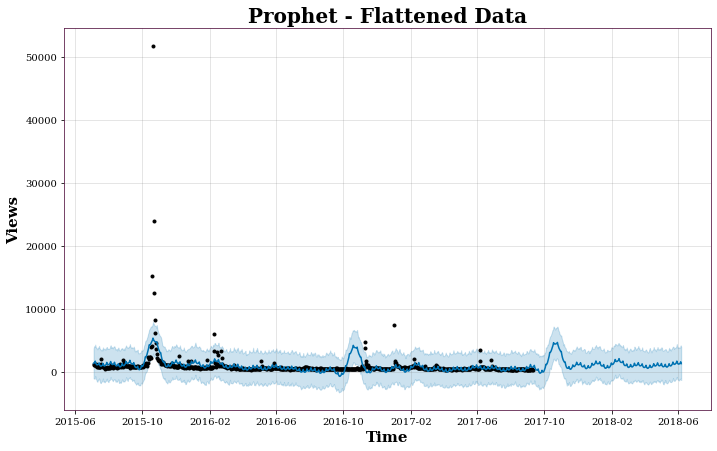

In [ ]:
m.plot(forecast)
plt.title("Prophet - Flattened Data", fontweight = 'bold', fontsize = 20)
plt.xlabel("Time", fontsize = 15, fontweight = 'bold')
plt.ylabel("Views", fontsize = 15, fontweight = 'bold')

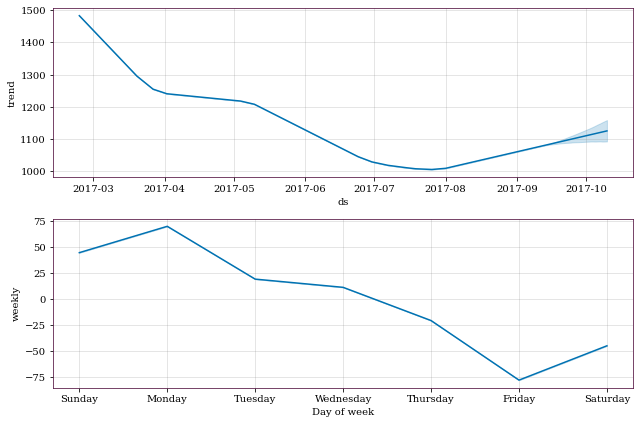

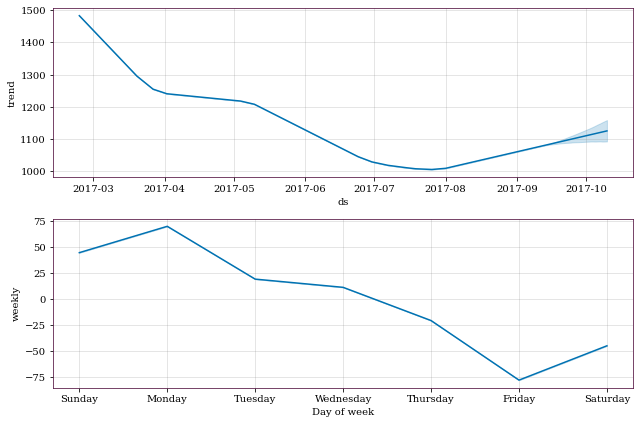

In [ ]:
m.plot_components(forecast)


In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2017-02-23,1462.008420,1399.844178,1524.548323
1,2017-02-24,1397.318639,1337.241152,1460.890340
2,2017-02-25,1422.752277,1355.738385,1487.672238
3,2017-02-26,1504.669981,1436.413954,1566.866315
4,2017-02-27,1522.434416,1461.945774,1586.687804


In [ ]:
train = df_prophet.drop(df_prophet.index[-200:])
y_true = df_prophet['y'][-200:].values
y_pred = forecast['yhat'][-200:].values

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_true, y_pred), mean_squared_error(y_true, y_pred), np.sqrt(mean_squared_error(y_true, y_pred))

(97.05663302619296, 15723.843744363692, 125.3947516619563)

# **Evaluation**

In [ ]:
def smape(A, F):
      print(100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))

In [ ]:
smape(np.array(y_true), np.array(y_pred))

8.437196102753608


In [ ]:
path = os.path.join(baseDir,datasets, 'test_data.csv')
testing = pd.read_csv(path)
testing

,Page,2018010100,2018010200,2018010300,2018010400,2018010500,2018010600,2018010700,2018010800,2018010900,2018011000,2018011100,2018011200,2018011300,2018011400,2018011500,2018011600,2018011700,2018011800,2018011900,2018012000,2018012100,2018012200,2018012300,2018012400,2018012500,2018012600,2018012700,2018012800,2018012900,2018013000,2018013100,2018020100,2018020200,2018020300,2018020400,2018020500,2018020600,2018020700,2018020800,...,2019112200,2019112300,2019112400,2019112500,2019112600,2019112700,2019112800,2019112900,2019113000,2019120100,2019120200,2019120300,2019120400,2019120500,2019120600,2019120700,2019120800,2019120900,2019121000,2019121100,2019121200,2019121300,2019121400,2019121500,2019121600,2019121700,2019121800,2019121900,2019122000,2019122100,2019122200,2019122300,2019122400,2019122500,2019122600,2019122700,2019122800,2019122900,2019123000,2019123100
0,黒い霧事件_(日本プロ野球)_ja.wikipedia_desktop_all-agents,154.0,128.0,160.0,208.0,322.0,218.0,168.0,353.0,248.0,201.0,119.0,169.0,115.0,108.0,220.0,171.0,154.0,151.0,232.0,106.0,253.0,677.0,231.0,249.0,521.0,184.0,247.0,192.0,207.0,340.0,190.0,166.0,393.0,237.0,263.0,330.0,189.0,275.0,313.0,...,121.0,52.0,99.0,592.0,252.0,279.0,711.0,236.0,95.0,129.0,144.0,386.0,880.0,581.0,358.0,159.0,125.0,311.0,178.0,185.0,124.0,143.0,62.0,107.0,195.0,140.0,116.0,97.0,114.0,88.0,83.0,134.0,135.0,173.0,116.0,137.0,82.0,80.0,80.0,87.0
1,笹川陽平_ja.wikipedia_desktop_all-agents,38.0,77.0,78.0,65.0,75.0,51.0,63.0,64.0,87.0,91.0,115.0,86.0,52.0,59.0,75.0,63.0,108.0,94.0,70.0,65.0,62.0,91.0,67.0,97.0,92.0,93.0,71.0,58.0,104.0,118.0,109.0,80.0,84.0,57.0,89.0,125.0,160.0,95.0,102.0,...,61.0,56.0,50.0,76.0,70.0,187.0,118.0,125.0,49.0,60.0,95.0,86.0,91.0,91.0,97.0,74.0,52.0,152.0,194.0,172.0,87.0,72.0,50.0,39.0,82.0,74.0,82.0,110.0,75.0,72.0,52.0,118.0,105.0,125.0,100.0,404.0,54.0,45.0,51.0,56.0
2,バンジージャンプ_ja.wikipedia_desktop_all-agents,21.0,16.0,19.0,26.0,35.0,48.0,87.0,54.0,33.0,38.0,38.0,22.0,28.0,16.0,26.0,38.0,16.0,29.0,23.0,38.0,21.0,26.0,25.0,13.0,23.0,21.0,31.0,11.0,48.0,19.0,31.0,26.0,23.0,17.0,27.0,41.0,34.0,25.0,27.0,...,29.0,30.0,31.0,31.0,46.0,29.0,38.0,45.0,32.0,35.0,26.0,45.0,36.0,36.0,30.0,30.0,25.0,31.0,44.0,39.0,39.0,29.0,15.0,24.0,41.0,30.0,23.0,25.0,40.0,26.0,26.0,27.0,40.0,25.0,31.0,31.0,21.0,33.0,20.0,22.0
3,バック・トゥ・ザ・フューチャー_ja.wikipedia_desktop_all-agents,232.0,306.0,340.0,318.0,271.0,292.0,396.0,386.0,341.0,374.0,358.0,329.0,316.0,346.0,341.0,428.0,365.0,377.0,341.0,324.0,320.0,392.0,412.0,286.0,353.0,349.0,326.0,366.0,358.0,418.0,363.0,365.0,384.0,383.0,377.0,361.0,367.0,355.0,321.0,...,467.0,417.0,442.0,425.0,394.0,475.0,344.0,528.0,399.0,522.0,435.0,408.0,378.0,428.0,401.0,414.0,404.0,370.0,431.0,349.0,489.0,492.0,417.0,359.0,420.0,436.0,418.0,482.0,423.0,1083.0,527.0,592.0,497.0,470.0,502.0,535.0,478.0,502.0,2007.0,1336.0
4,メーガン・マークル_ja.wikipedia_desktop_all-agents,199.0,128.0,197.0,164.0,200.0,200.0,603.0,327.0,301.0,215.0,234.0,1200.0,499.0,263.0,439.0,758.0,404.0,641.0,512.0,162.0,203.0,259.0,175.0,173.0,155.0,137.0,117.0,151.0,242.0,122.0,142.0,136.0,177.0,125.0,90.0,105.0,151.0,164.0,163.0,...,7.0,6.0,8.0,7.0,10.0,8.0,8.0,16.0,10.0,8.0,13.0,12.0,7.0,11.0,8.0,11.0,12.0,11.0,3.0,6.0,8.0,6.0,8.0,8.0,8.0,13.0,5.0,5.0,5.0,11.0,5.0,7.0,5.0,7.0,8.0,10.0,9.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,User:Kingchang711_zh.wikipedia_all-access_spider,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,0.0,1.0,NaN,1.0,11.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,NaN,1.0,2.0,NaN,0.0,...,NaN,1.0,3.0,1.0,NaN,2.0,NaN,NaN,1.0,0.0,0.0,1.0,3.0,1.0,3.0,NaN,3.0,1.0,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,NaN,NaN,0.0,NaN,NaN,5.0,3.0,1.0,NaN
63852,User:Caoli

In [ ]:
test_details = testing.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia\_(?P<access>.*)\_(?P<type>.*)')

test_details.tail()

,topic,lang,access,type
63851,User:Kingchang711,zh,all-access,spider
63852,User:Caoliucm,zh,all-access,spider
63853,User_talk:Caoliushequa,zh,all-access,spider
63854,ViVid_Strike!,zh,all-access,spider
63855,ViuTV,zh,all-access,spider


In [ ]:
train_df = pd.read_csv(os.path.join(baseDir, datasets, 'data_2015-17.csv'))
train_df

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,46.0,24.0,22.0,22.0,11.0,25.0,45.0,39.0,17.0,18.0,13.0,57.0,18.0,14.0,19.0,39.0,22.0,16.0,28.0,21.0,37.0,58.0,25.0,23.0,25.0,47.0,44.0,26.0,24.0,21.0,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,39.0,20.0,31.0,19.0,7.0,11.0,20.0,13.0,16.0,16.0,47.0,21.0,20.0,12.0,13.0,20.0,22.0,20.0,12.0,37.0,14.0,34.0,16.0,31.0,34.0,33.0,32.0,29.0,34.0,25.0,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,22.0,8.0,4.0,3.0,1.0,3.0,7.0,3.0,1.0,9.0,4.0,2.0,6.0,3.0,3.0,3.0,8.0,2.0,4.0,3.0,6.0,23.0,11.0,8.0,6.0,13.0,12.0,8.0,12.0,9.0,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,37.0,14.0,12.0,13.0,11.0,10.0,14.0,15.0,15.0,11.0,19.0,9.0,19.0,8.0,17.0,11.0,18.0,20.0,11.0,11.0,21.0,42.0,23.0,17.0,11.0,21.0,20.0,20.0,110.0,15.0,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,39.0,66.0,114.0,19.0,29.0,12.0,11.0,14.0,14.0,63.0,12.0,22.0,14.0,20.0,11.0,23.0,66.0,19.0,23.0,23.0,41.0,25.0,22.0,20.0,24.0,29.0,20.0,17.0,24.0,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,Underworld_(serie_de_películas)_es.wikipedia.o...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,2.0,3.0,4.0,3.0,2.0,2.0,0.0,3.0,1.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,7.0,6.0,8.0,5.0,7.0,7.0,7.0,8.0,2.0,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,Resident_Evil:_Capítulo_Final_es.wikipedia.org...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,6.0,1.0,2.0,3.0,3.0,18.0,4.0,5.0,3.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,9.0,10.0,8.0,6.0,3.0,9.0,2.0,11.0,3.0,3.0,4.0,4.0,7.0

In [ ]:
page_details = train.Page.str.extract(r'(?P<topic>.*)\_(?P<lang>.*).wikipedia.org\_(?P<access>.*)\_(?P<type>.*)')

page_details[0:10]

,topic,lang,access,type
0,2NE1,zh,all-access,spider
1,2PM,zh,all-access,spider
2,3C,zh,all-access,spider
3,4minute,zh,all-access,spider
4,52_Hz_I_Love_You,zh,all-access,spider
5,5566,zh,all-access,spider
6,91Days,zh,all-access,spider
7,A'N'D,zh,all-access,spider
8,AKB48,zh,all-access,spider
9,ASCII,zh,all-access,spider


In [ ]:
test_df = pd.concat([test_details, testing], axis=1)
test_df

,topic,lang,access,type,Page,2018010100,2018010200,2018010300,2018010400,2018010500,2018010600,2018010700,2018010800,2018010900,2018011000,2018011100,2018011200,2018011300,2018011400,2018011500,2018011600,2018011700,2018011800,2018011900,2018012000,2018012100,2018012200,2018012300,2018012400,2018012500,2018012600,2018012700,2018012800,2018012900,2018013000,2018013100,2018020100,2018020200,2018020300,2018020400,...,2019112200,2019112300,2019112400,2019112500,2019112600,2019112700,2019112800,2019112900,2019113000,2019120100,2019120200,2019120300,2019120400,2019120500,2019120600,2019120700,2019120800,2019120900,2019121000,2019121100,2019121200,2019121300,2019121400,2019121500,2019121600,2019121700,2019121800,2019121900,2019122000,2019122100,2019122200,2019122300,2019122400,2019122500,2019122600,2019122700,2019122800,2019122900,2019123000,2019123100
0,黒い霧事件_(日本プロ野球),ja,desktop,all-agents,黒い霧事件_(日本プロ野球)_ja.wikipedia_desktop_all-agents,154.0,128.0,160.0,208.0,322.0,218.0,168.0,353.0,248.0,201.0,119.0,169.0,115.0,108.0,220.0,171.0,154.0,151.0,232.0,106.0,253.0,677.0,231.0,249.0,521.0,184.0,247.0,192.0,207.0,340.0,190.0,166.0,393.0,237.0,263.0,...,121.0,52.0,99.0,592.0,252.0,279.0,711.0,236.0,95.0,129.0,144.0,386.0,880.0,581.0,358.0,159.0,125.0,311.0,178.0,185.0,124.0,143.0,62.0,107.0,195.0,140.0,116.0,97.0,114.0,88.0,83.0,134.0,135.0,173.0,116.0,137.0,82.0,80.0,80.0,87.0
1,笹川陽平,ja,desktop,all-agents,笹川陽平_ja.wikipedia_desktop_all-agents,38.0,77.0,78.0,65.0,75.0,51.0,63.0,64.0,87.0,91.0,115.0,86.0,52.0,59.0,75.0,63.0,108.0,94.0,70.0,65.0,62.0,91.0,67.0,97.0,92.0,93.0,71.0,58.0,104.0,118.0,109.0,80.0,84.0,57.0,89.0,...,61.0,56.0,50.0,76.0,70.0,187.0,118.0,125.0,49.0,60.0,95.0,86.0,91.0,91.0,97.0,74.0,52.0,152.0,194.0,172.0,87.0,72.0,50.0,39.0,82.0,74.0,82.0,110.0,75.0,72.0,52.0,118.0,105.0,125.0,100.0,404.0,54.0,45.0,51.0,56.0
2,バンジージャンプ,ja,desktop,all-agents,バンジージャンプ_ja.wikipedia_desktop_all-agents,21.0,16.0,19.0,26.0,35.0,48.0,87.0,54.0,33.0,38.0,38.0,22.0,28.0,16.0,26.0,38.0,16.0,29.0,23.0,38.0,21.0,26.0,25.0,13.0,23.0,21.0,31.0,11.0,48.0,19.0,31.0,26.0,23.0,17.0,27.0,...,29.0,30.0,31.0,31.0,46.0,29.0,38.0,45.0,32.0,35.0,26.0,45.0,36.0,36.0,30.0,30.0,25.0,31.0,44.0,39.0,39.0,29.0,15.0,24.0,41.0,30.0,23.0,25.0,40.0,26.0,26.0,27.0,40.0,25.0,31.0,31.0,21.0,33.0,20.0,22.0
3,バック・トゥ・ザ・フューチャー,ja,desktop,all-agents,バック・トゥ・ザ・フューチャー_ja.wikipedia_desktop_all-agents,232.0,306.0,340.0,318.0,271.0,292.0,396.0,386.0,341.0,374.0,358.0,329.0,316.0,346.0,341.0,428.0,365.0,377.0,341.0,324.0,320.0,392.0,412.0,286.0,353.0,349.0,326.0,366.0,358.0,418.0,363.0,365.0,384.0,383.0,377.0,...,467.0,417.0,442.0,425.0,394.0,475.0,344.0,528.0,399.0,522.0,435.0,408.0,378.0,428.0,401.0,414.0,404.0,370.0,431.0,349.0,489.0,492.0,417.0,359.0,420.0,436.0,418.0,482.0,423.0,1083.0,527.0,592.0,497.0,470.0,502.0,535.0,478.0,502.0,2007.0,1336.0
4,メーガン・マークル,ja,desktop,all-agents,メーガン・マークル_ja.wikipedia_desktop_all-agents,199.0,128.0,197.0,164.0,200.0,200.0,603.0,327.0,301.0,215.0,234.0,1200.0,499.0,263.0,439.0,758.0,404.0,641.0,512.0,162.0,203.0,259.0,175.0,173.0,155.0,137.0,117.0,151.0,242.0,122.0,142.0,136.0,177.0,125.0,90.0,...,7.0,6.0,8.0,7.0,10.0,8.0,8.0,16.0,10.0,8.0,13.0,12.0,7.0,11.0,8.0,11.0,12.0,11.0,3.0,6.0,8.0,6.0,8.0,8.0,8.0,13.0,5.0,5.0,5.0,11.0,5.0,7.0,5.0,7.0,8.0,10.0,9.0,7.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,User:Kingchang711,zh,all-access,spider,User:Kingchang711_zh.wikipedia_all-access_spider,0.0,0.0,0.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,4.0,0.0,1.0,NaN,1.0,11.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,NaN,2.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,1.0,NaN,...,NaN,1.0,3.0,1.0,NaN,2.0,NaN,NaN,1.0,0.0,0.0,1.0,3.0,1.0,3.0,NaN,3.0,1.0,NaN,NaN,2.0,1.0,2.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,

In [ ]:
def extract_series(df, row_num, start_idx):
    y = df.iloc[row_num, start_idx:]
    df = pd.DataFrame({ 'ds': y.index, 'y': y.values})
    return df

In [ ]:
train_df.topic[(train_df.topic == 'バック・トゥ・ザ・フューチャー') & (train_df.lang == 'ja') & (train_df.access == 'desktop') & (train_df.type == 'all-agents')].index.tolist(), test_df.topic[(test_df.topic == 'バック・トゥ・ザ・フューチャー') & (test_df.lang == 'ja') & (test_df.access == 'desktop') & (test_df.type == 'all-agents')].index.tolist()

In [69]:
df_actual = extract_series(test_df, 3, 5)
df_train = extract_series(train_df, 86023, 5)
df_train

,ds,y
0,2015-07-05,993
1,2015-07-06,1288
2,2015-07-07,1054
3,2015-07-08,994
4,2015-07-09,1220
...,...,...
794,2017-09-06,326
795,2017-09-07,381
796,2017-09-08,374
797,2017-09-09,302


In [ ]:
dates = list(df_actual.ds)
for _ in range(len(dates)):
 var = list(dates[_])
 dates[_] = ''.join(var[:4]) + '-' + ''.join(var[4:6]) + '-' + ''.join(var[6:8])
df_actual.drop(columns = ['ds'], inplace = True)
df_actual.insert(0, 'ds', value = dates)

In [ ]:
df_actual =  df_actual.iloc[:180, :]

In [ ]:
start_date = df_actual.ds.min()
end_date = df_actual.ds.max()

actual_series = df_actual.y.copy()
actual_series.index = df_actual.ds

df_train['y'] = df_train['y'].astype('float').values

df_actual['y'] = df_actual['y'].astype('float').values

m = Prophet()
m.fit(df_train)
# future = m.make_future_dataframe(periods=(365 * 2) + 90)
future = m.make_future_dataframe(periods= 180 + 90)
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
start_date, end_date

('2018-01-01', '2018-06-29')

In [ ]:
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-05,1627.365462,-1060.862595,3669.267190,1627.365462,1627.365462,-291.298230,-291.298230,-291.298230,-116.266396,-116.266396,-116.266396,-175.031834,-175.031834,-175.031834,0.0,0.0,0.0,1336.067232
1,2015-07-06,1625.923684,-1101.433652,4044.678650,1625.923684,1625.923684,-233.466144,-233.466144,-233.466144,-33.422128,-33.422128,-33.422128,-200.044016,-200.044016,-200.044016,0.0,0.0,0.0,1392.457540
2,2015-07-07,1624.481906,-1105.115315,3880.722656,1624.481906,1624.481906,-186.381395,-186.381395,-186.381395,42.829600,42.829600,42.829600,-229.210995,-229.210995,-229.210995,0.0,0.0,0.0,1438.100511
3,2015-07-08,1623.040128,-658.274094,4304.939823,1623.040128,1623.040128,49.833132,49.833132,49.833132,311.727653,311.727653,311.727653,-261.894522,-261.894522,-261.894522,0.0,0.0,0.0,1672.873259
4,2015-07-09,1621.598350,-1092.083775,3886.869457,1621.598350,1621.598350,-257.851166,-257.851166,-257.851166,39.475245,39.475245,39.475245,-297.326411,-297.326411,-297.326411,0.0,0.0,0.0,1363.747183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1064,2018-06-03,1324.693311,-1411.205315,3780.547868,1138.489434,1522.875382,-108.177526,-108.177526,-108.177526,-116.266396,-116.266396,-116.266396,8.088870,8.088870,8.088870,0.0,0.0,0.0,1216.515785
1065,2018-06-04,1326.310546,-1173.935098,3775.216974,1139.135249,1525.029267,-46.413209,-46.413209,-46.413209,-33.422128,-33.422128,-33.422128,-12.991081,-12.991081,-12.991081,0.0,0.0,0.0,1279.897337
1066,2018-06-05,1327.927781,-1227.193150,3851.188639,1139.824752,1527.110856,5.541110,5.541110,5.541110,42.829600,42.829600,42.829600,-37.288490,-37.288490,-37.288490,0.0,0.0,0.0,1333.468891
1067,2018-06-06,1329.545016,-1045.615416,4189.545859,1140.078871,1529.192444,247.767060,247.767060,247.767060,311.727653,311.727653,311.727653,-63.960594,-63.960594,-63.960594,0.0,0.0,0.0,1577.312075


In [ ]:
def plot_prediction_and_actual(model, forecast, actual, xlim=None, ylim=None, figSize=None, title=None):
    fig, ax  = plt.subplots(1,1,figsize=figSize)
    ax.set_ylim(ylim)
    ax.plot(pd.to_datetime(actual.ds), actual.y, 'r.')
    model.plot(forecast, ax=ax);
    plt.title(title, fontweight = 'bold', fontsize = 20)
    plt.xlabel("Time", fontsize = 15, fontweight = 'bold')
    plt.ylabel("Views", fontsize = 15, fontweight = 'bold')
    plt.show()

In [ ]:
def normal_model(df_train, df_actual, review=False):
    start_date = df_actual.ds.min()
    end_date = df_actual.ds.max()
    
    actual_series = df_actual.y.copy()
    actual_series.index = df_actual.ds

    df_train['y'] = df_train['y'].astype('float').values
    
    df_actual['y'] = df_actual['y'].astype('float').values
    
    m = Prophet()
    m.fit(df_train)
    future = m.make_future_dataframe(periods= 180 + 90)
    forecast = m.predict(future)
        
    if(review):
        ymin = min(df_actual.y.min(), df_train.y.min()) -100
        ymax = max(df_actual.y.max(), df_train.y.max()) +100
        plot_prediction_and_actual(m, forecast, df_actual, ylim=[ymin, ymax], figSize=(20,3), title='Facebook - Prophet')

    def smape(A, F):
      print(100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))


    print("\n\n\n",smape(np.array(list(df_actual['y'])), np.array(list(forecast.iloc[-180: , -1]))), mean_absolute_error(forecast.iloc[-180: , -1], df_actual['y']), mean_squared_error(forecast.iloc[-180: , -1], df_actual['y']), np.sqrt(mean_squared_error(forecast.iloc[-180: , -1], df_actual['y'])))


In [ ]:
start_date, end_date

('2018-01-01', '2018-06-29')

In [ ]:
df_train

,ds,y
0,2015-07-05,993.0
1,2015-07-06,1288.0
2,2015-07-07,1054.0
3,2015-07-08,994.0
4,2015-07-09,1220.0
...,...,...
794,2017-09-06,326.0
795,2017-09-07,381.0
796,2017-09-08,374.0
797,2017-09-09,302.0


In [ ]:
df_actual.iloc[177, 1] = 0
# df_actual[df_actual['y'] > 2500]

# **Evaluation**

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


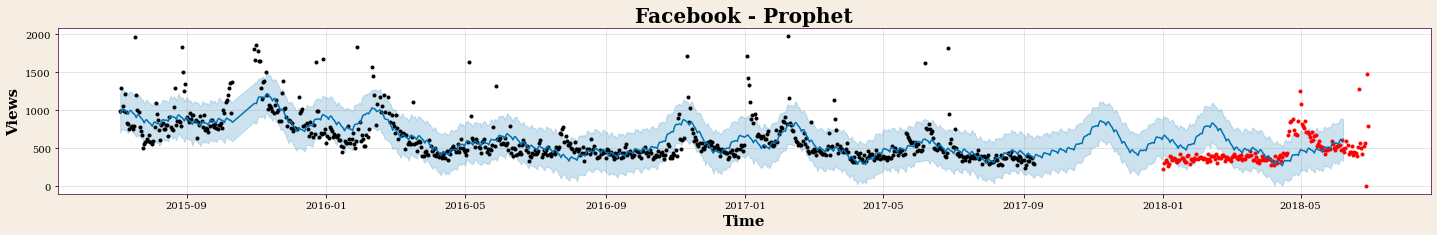

42.966477781699915



 None 220.88324414112407 75844.55446890026 275.39890063124847


In [ ]:
lang = train_df.iloc[2, 1]
normal_model(df_train[df_train.y < 2000].copy(), df_actual.copy(), lang)

In [ ]:
#   220.35201203633858 75615.30445361293 274.982371168795
# (110.45528734482356, 18774.875982216836, 137.0214435123818)